In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
pwd

'C:\\Users\\Asus\\Jupyter_notebook_proj'

In [9]:
#importing the dataset from csv file to a pandas Dataframe
customer_data=pd.read_csv("Mall_Customers.csv")

In [11]:
#first 5 rows in data
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
#Number of Rows and Coloumns
customer_data.shape

(200, 5)

In [14]:
#some information reagarding the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
 #checking for all missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 Choosing the Annual income coloumn and the Spending Score Coloumn


In [16]:
X=customer_data.iloc[:,[3,4]].values
#iloc-> used to locate the particular coloumns
#here we want only 3rd and 4th coloumn so we are locating 3,4 coloumn

In [21]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of Clusters

WCSS->Within cluster sum of squares
the distance between the datapoint and the centroid

In [23]:
#finding wcss value for different number of clusters

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

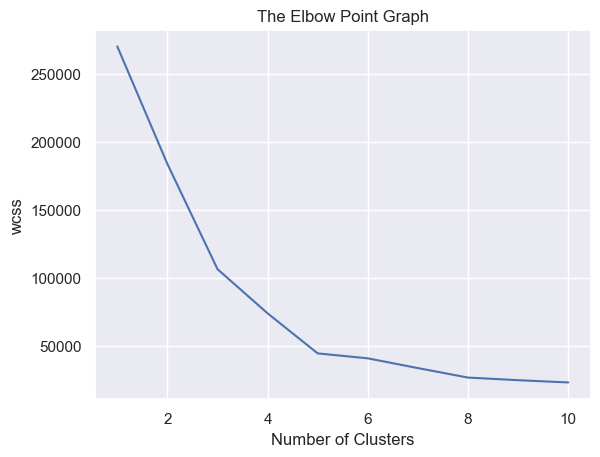

In [24]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

Optimum number of Clusters=5

Training the K-Means Clustering Model

In [25]:
kmenas = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[6 3 4 3 6 3 4 3 4 3 4 3 4 3 4 3 6 8 6 3 6 8 4 8 4 3 6 8 6 3 4 8 4 3 4 3 4
 8 6 8 6 3 6 8 6 8 8 6 6 6 0 8 0 8 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 0 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 1 2 5 2 5 2 1 2 1 2 5 2 1 7 1 7 1 7
 1 7 1 7 1 7 1 7 1 7 9 7 9 7 9]


Visualizing all the clusters

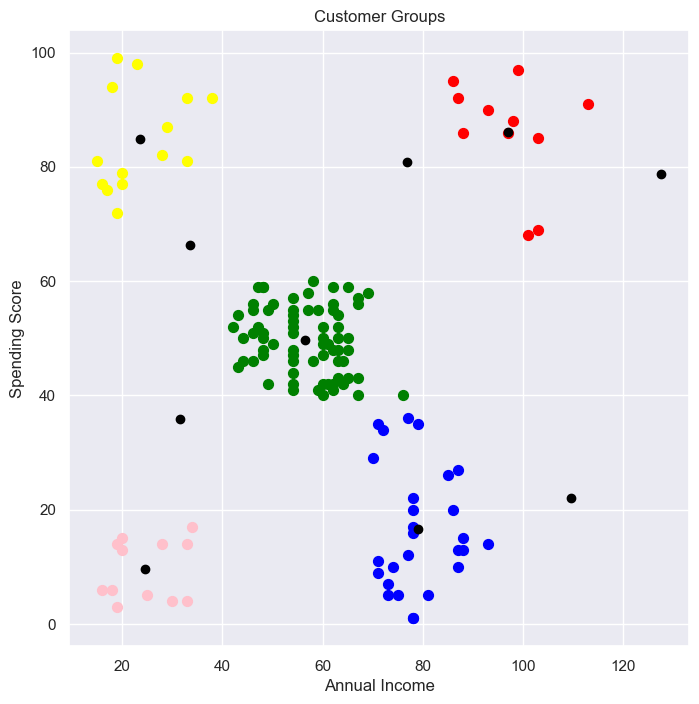

In [29]:
#plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='green', label='Cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='red', label='Cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='blue', label='Cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='yellow', label='Cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='pink', label='Cluster5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black',label='centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()